In [1]:
import pandas as pd
import os 
import zipfile
import csv

In [39]:
!ls /home/dsc/Data/opentraveldata/

create_table_optd_aircraft.sql	  optd_airlines.csv
create_table_optd_airlines.sql	  optd_por_public.csv
create_table_optd_por_public.sql  optd_por_public_with_errors.csv
Finn.txt			  optd_por_public_with_errors_null2.csv
grep2				  optd_por_public_with_errors_null.csv
grepfile2			  optd_por_public_without_errors.csv
grepfile.gz			  ref_airline_nb_of_flights.csv
optd_aircraft.csv		  tmp


In [40]:
path_to_csvs = '/home/dsc/Data/opentraveldata' 

In [41]:
!ls {path_to_csvs} ## las llaves sirven para meter variables

create_table_optd_aircraft.sql	  optd_airlines.csv
create_table_optd_airlines.sql	  optd_por_public.csv
create_table_optd_por_public.sql  optd_por_public_with_errors.csv
Finn.txt			  optd_por_public_with_errors_null2.csv
grep2				  optd_por_public_with_errors_null.csv
grepfile2			  optd_por_public_without_errors.csv
grepfile.gz			  ref_airline_nb_of_flights.csv
optd_aircraft.csv		  tmp


In [42]:
path_to_csvs

'/home/dsc/Data/opentraveldata'

In [43]:
csvs = !ls '/home/dsc/Data/opentraveldata/' 

In [44]:
csvs

['create_table_optd_aircraft.sql',
 'create_table_optd_airlines.sql',
 'create_table_optd_por_public.sql',
 'Finn.txt',
 'grep2',
 'grepfile2',
 'grepfile.gz',
 'optd_aircraft.csv',
 'optd_airlines.csv',
 'optd_por_public.csv',
 'optd_por_public_with_errors.csv',
 'optd_por_public_with_errors_null2.csv',
 'optd_por_public_with_errors_null.csv',
 'optd_por_public_without_errors.csv',
 'ref_airline_nb_of_flights.csv',
 'tmp']

In [45]:
path_vm = '/home/dsc/Data/opentraveldata' 

In [46]:
!head {path_to_csvs + '/' + csvs[7]}

iata_code^manufacturer^model^iata_group^iata_category^icao_code^nb_engines^aircraft_type
100^Fokker^100^100^2J^F100^2^J
141^BAe^146-100^146^4J^B461^4^J
142^BAe^BAE Systems 146-200 Passenger^146^4J^B462^4^J
143^BAe^146-300^146^4J^B463^4^J
146^BAe^146^^^^^
14F^BAe^146 Freighter (-100/200/300QT & QC)^^^^^
14X^BAe^146 Freighter (-100QT & QC)^14F^4J^B461^4^J
14Y^BAe^146 Freighter (-200QT & QC)^14F^4J^B462^4^J
14Z^BAe^146 Freighter (-300QT & QC)^14F^4J^B463^4^J


In [47]:
path_to_aircraft1 = path_to_csvs + '/' + csvs[7]

In [48]:
path_to_aircraft1

'/home/dsc/Data/opentraveldata/optd_aircraft.csv'

### 

In [49]:
df_ac = pd.read_csv ('/home/dsc/Data/opentraveldata/optd_aircraft.csv',sep='^')

In [50]:
pwd

u'/home/dsc'

In [51]:
path_to_csvs+'/optd_aircraft.csv'

'/home/dsc/Data/opentraveldata/optd_aircraft.csv'

In [52]:
df_ac3 = pd.read_csv (path_to_aircraft1,sep='^')

In [53]:
len(df_ac)

457

In [54]:
df_ac.to_excel('ac.xls')

In [55]:
import sqlite3

In [56]:
conn = sqlite3.connect('example.db')

In [57]:
len(df_ac)

457

In [58]:
df_ac.to_sql('aircraft',conn,if_exists='replace')

In [59]:
df_ac.to_json(orient='records')

'[{"iata_code":"100","manufacturer":"Fokker","model":"100","iata_group":"100","iata_category":"2J","icao_code":"F100","nb_engines":2.0,"aircraft_type":"J"},{"iata_code":"141","manufacturer":"BAe","model":"146-100","iata_group":"146","iata_category":"4J","icao_code":"B461","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"142","manufacturer":"BAe","model":"BAE Systems 146-200 Passenger","iata_group":"146","iata_category":"4J","icao_code":"B462","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"143","manufacturer":"BAe","model":"146-300","iata_group":"146","iata_category":"4J","icao_code":"B463","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"146","manufacturer":"BAe","model":"146","iata_group":null,"iata_category":null,"icao_code":null,"nb_engines":null,"aircraft_type":null},{"iata_code":"14F","manufacturer":"BAe","model":"146 Freighter (-100\\/200\\/300QT & QC)","iata_group":null,"iata_category":null,"icao_code":null,"nb_engines":null,"aircraft_type":null},{"iata_code":"14X","m

In [60]:
df2 = pd.read_excel('ac.xls')

df2.head()

In [61]:
df2.head()


,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


In [62]:
df3 = pd.read_sql_query('select * from aircraft',conn)

In [63]:
##GROU`BY

In [64]:
df_ac.head()

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


In [65]:
gb = df_ac.groupby(df_ac['manufacturer'])

In [66]:
gb

In [67]:
gb['nb_engines']

In [68]:
gb_2 = df_ac.groupby(['manufacturer','iata_group'])

In [69]:
gb_2.head()

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN
5,14F,BAe,146 Freighter (-100/200/300QT & QC),NaN,NaN,NaN,NaN,NaN
6,14X,BAe,146 Freighter (-100QT & QC),14F,4J,B461,4,J
7,14Y,BAe,146 Freighter (-200QT & QC),14F,4J,B462,4,J
8,14Z,BAe,146 Freighter (-300QT & QC),14F,4J,B463,4,J
9,19D,Airbus,A319,NaN,NaN,NaN,NaN,NaN


In [70]:
gb_2['nb_engines'].mean()

manufacturer               iata_group
ATR                        ATF           2.000000
                           ATR           2.000000
                           ATZ           2.000000
Aerospatiale / SNIAS       NDC           2.000000
Agusta / AgustaWestland    AGH                NaN
AgustaWestland             AWH           2.000000
Airbus                     310           2.000000
                           31F           2.000000
                           32F           2.000000
                           32S           2.000000
                           32X           2.000000
                           330           2.000000
                           33F           2.000000
                           340           4.000000
                           350           2.000000
                           380           4.000000
                           38F           4.000000
                           AB3           2.000000
                           ABF           2.000000
Aircraft Ind

In [71]:
gb_2['nb_engines'].count()

manufacturer               iata_group
ATR                        ATF           1
                           ATR           4
                           ATZ           1
Aerospatiale / SNIAS       NDC           1
Agusta / AgustaWestland    AGH           0
AgustaWestland             AWH           1
Airbus                     310           2
                           31F           2
                           32F           1
                           32S           6
                           32X           1
                           330           2
                           33F           1
                           340           4
                           350           3
                           380           1
                           38F           1
                           AB3           2
                           ABF           3
Aircraft Industries (LET)  L4F           1
Airtech                    CS5           1
Antonov                    A22           1
                

In [72]:
##iterating over groups

In [73]:
for name, group in df_ac.groupby('manufacturer'):
    print name
    print group

ATR
    iata_code manufacturer             model iata_group iata_category  \
173       AT4          ATR  ATR 42-300 / 320        ATR            2T   
174       AT5          ATR        ATR 42-500        ATR            2T   
175       AT7          ATR            ATR 72        ATR            2T   
176       ATD          ATR        ATR 42-400        ATR            2T   
177       ATF          ATR  ATR 72 Freighter        ATF            2T   
179       ATR          ATR   ATR 42 / ATR 72        NaN           NaN   
180       ATZ          ATR  ATR 42 Freighter        ATZ            2T   

    icao_code  nb_engines aircraft_type  
173      AT43           2             T  
174      AT45           2             T  
175      AT72           2             T  
176      AT44           2             T  
177      AT72           2             T  
179       NaN         NaN           NaN  
180         *           2             T  
Aerospatiale / SNIAS
    iata_code          manufacturer            model i

In [74]:
for name, group in df_ac.groupby('manufacturer'):
    print name
    print group [['nb_engines','icao_code']]

ATR
     nb_engines icao_code
173           2      AT43
174           2      AT45
175           2      AT72
176           2      AT44
177           2      AT72
179         NaN       NaN
180           2         *
Aerospatiale / SNIAS
     nb_engines icao_code
411           2      S601
435         NaN       NaN
Agusta / AgustaWestland
     nb_engines icao_code
159         NaN      A109
AgustaWestland
     nb_engines icao_code
181           2      A139
Airbus
     nb_engines icao_code
9           NaN       NaN
10          NaN       NaN
11            2      A310
12            2      A310
13            2      A318
14            2      A319
15          NaN       NaN
16          NaN       NaN
17            2      A310
18            2      A310
19            2      A320
20            2      A321
21            2      A320
22            2      A321
23          NaN       NaN
24          NaN       NaN
25            2      A320
26            2      A321
27          NaN       NaN
28            2    

In [75]:
for (k1,k2), grou in df_ac.groupby (['manufacturer','iata_code']):
    print k1
    print k2
    print group[['nb_engines','icao_code']]

ATR
AT4
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
AT5
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
AT7
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
ATD
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
ATF
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
ATR
     nb_engines icao_code
452           3      YK42
453           3      YK40
ATR
ATZ
     nb_engines icao_code
452           3      YK42
453           3      YK40
Aerospatiale / SNIAS
NDC
     nb_engines icao_code
452           3      YK42
453           3      YK40
Aerospatiale / SNIAS
SSC
     nb_engines icao_code
452           3      YK42
453           3      YK40
Agusta / AgustaWestland
AGH
     nb_engines icao_code
452           3      YK42
453           3      YK40
AgustaWestland
AWH
     nb_engines icao_code
452           3      YK42
453           3

In [76]:
gb4 = df_ac.aggregate( ['nb_engines','icao_code'])

AttributeError: 'DataFrame' object has no attribute 'aggregate'

In [ ]:
gb5 = df_ac.agregate('mean','std')

In [ ]:
gb4

#### 

In [88]:
# ya hecho ! pip install seaborn 


  Using cached seaborn-0.7.0.tar.gz
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /home/dsc/.cache/pip/wheels/83/56/50/6dc42e822bb1b1aad5e8f2927b1c932dc89ee4e0b15dac98c6
Successfully built seaborn
You are using pip version 8.0.2, however version 8.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
##PLOTTING

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [90]:
%matplotlib inline

In [91]:
mu,sigma = 100, 15
x= mu + sigma * np.random.randn(10000)

In [92]:
x

array([ 116.54303448,  126.4235973 ,  100.65162604, ...,   90.51103801,
        113.9675161 ,  114.29368723])

[40, 160, 0, 0.04]

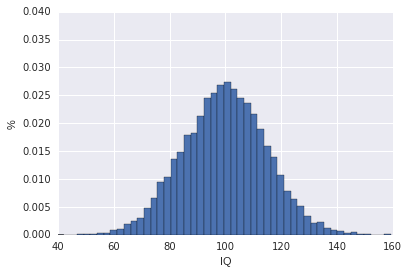

In [93]:
n,bins,patches = plt.hist(x,50,normed = 1)

plt.xlabel('IQ')
plt.ylabel('%')
plt.axis([40,160,0,0.04])

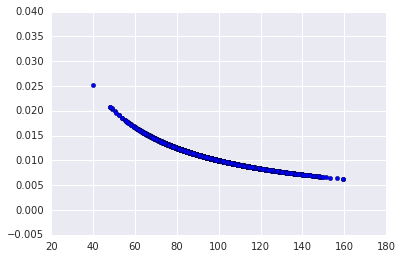

In [94]:
plt.scatter(x,1/x)

In [ ]:
n,bins,patches = plt.hist(x,50,normed = 1)

plt.xlabel('IQ')
plt.ylabel('%')
plt.axis([40,160,0,0.04])